In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('BreadBasket_DMS.csv')

In [7]:
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [4]:
df.shape

(21293, 4)

In [13]:
df.describe().style.background_gradient(cmap='Blues')

,Transaction
count,21293.000000
mean,4951.990889
std,2787.758400
min,1.000000
25%,2548.000000
50%,5067.000000
75%,7329.000000
max,9684.000000


In [14]:
df['datetime'] = pd.to_datetime(df.Date+' '+df.Time)

In [15]:
df.head()

,Date,Time,Transaction,Item,datetime
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57


In [16]:
df.drop(['Date', 'Time'], axis=1, inplace =True)

In [17]:
df.Item.unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

In [18]:
beverage = ['Hot chocolate', 'Coffee', 'Tea', 'Mineral water', 'Juice', 'Coke', 'Smoothies']
other = ['NONE', 'Christmas common', 'Gift voucher', "Valentine's card", 'Tshirt', 'Afternoon with the baker', 'Postcard', 'Siblings', 'Nomad bag', 'Adjustment', 'Drinking chocolate spoons ', 'Coffee granules ']
kids = ["Ella's Kitchen Pouches", 'My-5 Fruit Shoot', 'Kids biscuit']
snacks = ['Mighty Protein', 'Pick and Mix Bowls', 'Caramel bites', 'Bare Popcorn', 'Crisps', 'Cherry me Dried fruit', 'Raw bars']
bread = ['Bread', 'Toast', 'Baguette', 'Focaccia', 'Scandinavian']
breakfast_pastry = ['Muffin', 'Pastry', 'Medialuna', 'Scone']
dessert = ['Cookies', 'Tartine', 'Fudge', 'Victorian Sponge', 'Cake', 'Alfajores', 'Brownie', 'Bread Pudding', 'Bakewell', 'Raspberry shortbread sandwich', 'Lemon and coconut', 'Crepes', 'Chocolates', 'Truffles', 'Panatone']
condiments = ['Jam', 'Dulce de Leche', 'Honey', 'Gingerbread syrup', 'Extra Salami or Feta', 'Bacon', 'Spread', 'Chimichurri Oil']
breakfast = ['Eggs', 'Frittata', 'Granola', 'Muesli', 'Duck egg', 'Brioche and salami']
lunch = ['Soup', 'Sandwich', 'Chicken sand', 'Salad', 'Chicken Stew']
other_food = [x for x in df.Item.unique() if x not in beverage 
                and x not in other and x not in kids and x not in snacks 
                and x not in bread and x not in breakfast_pastry 
                and x not in dessert and x not in condiments 
                and x not in breakfast and x not in lunch]

In [19]:
df['beverage'] = df.Item.isin(beverage).astype(int)
df['other'] = df.Item.isin(other).astype(int)
df['kids'] = df.Item.isin(kids).astype(int)
df['snacks'] = df.Item.isin(snacks).astype(int)
df['bread'] = df.Item.isin(bread).astype(int)
df['breakfast_pastry'] = df.Item.isin(breakfast_pastry).astype(int)
df['breakfast'] = df.Item.isin(breakfast).astype(int)
df['dessert'] = df.Item.isin(dessert).astype(int)
df['condiments'] = df.Item.isin(condiments).astype(int)
df['lunch'] = df.Item.isin(lunch).astype(int)
df['other_food'] = df.Item.isin(other_food).astype(int)

In [20]:
df.head()

,Transaction,Item,datetime,beverage,other,kids,snacks,bread,breakfast_pastry,breakfast,dessert,condiments,lunch,other_food
0,1,Bread,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,0
1,2,Scandinavian,2016-10-30 10:05:34,0,0,0,0,1,0,0,0,0,0,0
2,2,Scandinavian,2016-10-30 10:05:34,0,0,0,0,1,0,0,0,0,0,0
3,3,Hot chocolate,2016-10-30 10:07:57,1,0,0,0,0,0,0,0,0,0,0
4,3,Jam,2016-10-30 10:07:57,0,0,0,0,0,0,0,0,1,0,0


In [21]:
df_group = df.groupby(['Transaction', 'datetime']).sum()
df_group.reset_index(level='datetime', inplace =True)

In [22]:
df_group['hour']=df_group.datetime.dt.hour
df_group['weekday']=df_group.datetime.dt.day_name()
df_group.head()

,datetime,Item,beverage,other,kids,snacks,bread,breakfast_pastry,breakfast,dessert,condiments,lunch,other_food,hour,weekday
Transaction,,,,,,,,,,,,,,,
1,2016-10-30 09:58:11,Bread,0,0,0,0,1,0,0,0,0,0,0,9,Sunday
2,2016-10-30 10:05:34,ScandinavianScandinavian,0,0,0,0,2,0,0,0,0,0,0,10,Sunday
3,2016-10-30 10:07:57,Hot chocolateJamCookies,1,0,0,0,0,0,0,1,1,0,0,10,Sunday
4,2016-10-30 10:08:41,Muffin,0,0,0,0,0,1,0,0,0,0,0,10,Sunday
5,2016-10-30 10:13:03,CoffeePastryBread,1,0,0,0,1,1,0,0,0,0,0,10,Sunday


In [23]:
df_group.weekday.value_counts()

weekday
Saturday     2068
Friday       1488
Sunday       1264
Thursday     1252
Tuesday      1203
Monday       1135
Wednesday    1121
Name: count, dtype: int64

<Axes: >

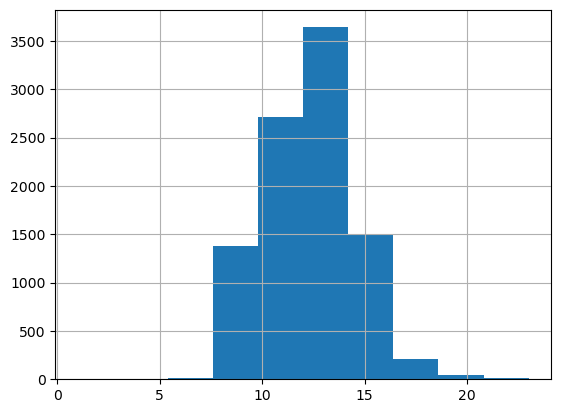

In [24]:
df_group.hour.hist()

In [25]:
df_group.datetime.dt.month.value_counts()

datetime
11    2154
3     1768
12    1696
2     1630
1     1598
4      510
10     175
Name: count, dtype: int64

In [26]:
df_ml = pd.get_dummies(data=df_group, columns=['weekday'], drop_first = True).copy()

In [27]:
df_ml.head()

,datetime,Item,beverage,other,kids,snacks,bread,breakfast_pastry,breakfast,dessert,condiments,lunch,other_food,hour,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
Transaction,,,,,,,,,,,,,,,,,,,,
1,2016-10-30 09:58:11,Bread,0,0,0,0,1,0,0,0,0,0,0,9,False,False,True,False,False,False
2,2016-10-30 10:05:34,ScandinavianScandinavian,0,0,0,0,2,0,0,0,0,0,0,10,False,False,True,False,False,False
3,2016-10-30 10:07:57,Hot chocolateJamCookies,1,0,0,0,0,0,0,1,1,0,0,10,False,False,True,False,False,False
4,2016-10-30 10:08:41,Muffin,0,0,0,0,0,1,0,0,0,0,0,10,False,False,True,False,False,False
5,2016-10-30 10:13:03,CoffeePastryBread,1,0,0,0,1,1,0,0,0,0,0,10,False,False,True,False,False,False


In [28]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA(0.85)
pca.fit(df_ml)
df_pca = pca.trnsform(df_ml)

TypeError: Cannot cast DatetimeArray to dtype float64

In [ ]:
df_pca = pd.DataFrame(df_pca, columns=['PC'+str(i) for i in range(1,6)])

In [36]:
from sklearn.cluster import KMeans

In [37]:
!pip install yellowbrick

  Using cached yellowbrick-1.3.post1-py3-none-any.whl (271 kB)


In [38]:
from yellowbrick.cluster import KElbowVisualizer

In [39]:
model = KMeans()
visualizer = KElbowVisualizer(model = model, k=(2,10))
visualizer.fit(df_pca)
visualizer.poof()

TypeError: __init__() missing 1 required positional argument: 'estimator'

In [1]:
model = KMeans(5)
model.fit(df_pca)

y_pred = model.predict(df_ml)


NameError: name 'KMeans' is not defined

In [ ]:
np.unique(y_pred, return_counts=True)

In [ ]:
model.cluster_centers_

In [ ]:
df_ml['cluster'] = model.labels_

In [ ]:
df_group['cluster'] = model.labels_

In [41]:
import seaborn as sns

In [ ]:
sns.set()
sns.heatmap(pd.crosstab(df_group.weekday, df_group.cluster, normalize=='columns'))

In [ ]:
sns.heatmap(pd.crosstab(df_group.weekday, df_group.hour, normalize=='columns'))

In [42]:
df[['Transaction', 'Item']]

,Transaction,Item
0,1,Bread
1,2,Scandinavian
2,2,Scandinavian
3,3,Hot chocolate
4,3,Jam
...,...,...
21288,9682,Coffee
21289,9682,Tea
21290,9683,Coffee
21291,9683,Pastry


In [44]:
df_group['cluster'].reset_index()

In [ ]:
df.merge(items,clusters, on='Transaction')
merge.groupby('cluster').Item.apply(lambda x:x.value_counts(normalize=True).nlargest(5)*100).round()).astype(int)

In [45]:
#Just KMeans

In [46]:
df_ml

,datetime,baverage,other,kids,beverage,snacks,bread,breakfast_pastry,breakfast,dessert,condiments,lunch,other_food,hour,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
Transaction,,,,,,,,,,,,,,,,,,,,
1,2016-10-30 09:58:11,0,0,0,0,0,1,0,0,0,0,0,0,9,0,0,1,0,0,0
2,2016-10-30 10:05:34,0,0,0,0,0,2,0,0,0,0,0,0,10,0,0,1,0,0,0
3,2016-10-30 10:07:57,1,0,0,1,0,0,0,0,1,1,0,0,10,0,0,1,0,0,0
4,2016-10-30 10:08:41,0,0,0,0,0,0,1,0,0,0,0,0,10,0,0,1,0,0,0
5,2016-10-30 10:13:03,1,0,0,1,0,1,1,0,0,0,0,0,10,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,2017-04-09 14:24:03,0,0,0,0,0,1,0,0,0,0,0,0,14,0,0,1,0,0,0
9681,2017-04-09 14:30:09,1,1,0,1,0,0,0,0,1,0,0,1,14,0,0,1,0,0,0
9682,2017-04-09 14:32:58,2,0,0,2,0,0,1,0,0,0,0,1,14,0,0,1,0,0,0


In [47]:
model = KMeans(5)
model.fit(df_ml)
model.labels_

TypeError: invalid type promotion

In [ ]:
df_group.cluster = model.labels_

In [ ]:
df_group.cluster.value_counts()

In [48]:
df_ml

,datetime,baverage,other,kids,beverage,snacks,bread,breakfast_pastry,breakfast,dessert,condiments,lunch,other_food,hour,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
Transaction,,,,,,,,,,,,,,,,,,,,
1,2016-10-30 09:58:11,0,0,0,0,0,1,0,0,0,0,0,0,9,0,0,1,0,0,0
2,2016-10-30 10:05:34,0,0,0,0,0,2,0,0,0,0,0,0,10,0,0,1,0,0,0
3,2016-10-30 10:07:57,1,0,0,1,0,0,0,0,1,1,0,0,10,0,0,1,0,0,0
4,2016-10-30 10:08:41,0,0,0,0,0,0,1,0,0,0,0,0,10,0,0,1,0,0,0
5,2016-10-30 10:13:03,1,0,0,1,0,1,1,0,0,0,0,0,10,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,2017-04-09 14:24:03,0,0,0,0,0,1,0,0,0,0,0,0,14,0,0,1,0,0,0
9681,2017-04-09 14:30:09,1,1,0,1,0,0,0,0,1,0,0,1,14,0,0,1,0,0,0
9682,2017-04-09 14:32:58,2,0,0,2,0,0,1,0,0,0,0,1,14,0,0,1,0,0,0


In [49]:
df_ml.hour = df_ml.hour/24

In [50]:
pca = PCA(0.85)
pca.fit(df_ml)

TypeError: invalid type promotion